# Plot superimposed Baker et al model responses to block and natural song

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from disp import plot_b, set_plot
import record_0_main as rcd_0
import record_1_ma_ext as rcd_1
import record_2_lin_ln as rcd_2


FPS = 30.03
DT = 1/FPS

NNRN = 224

In [2]:
MDLS_META = {
    'ma': ('k', 'baker_ma.npy', rcd_0.smlt_ma),
    'lnma_tweaked': ('m', 'baker_lnma_tweaked.npy', rcd_2.smlt_lnma_tweaked),
    # 'linma': ('b', 'baker_ma.npy', rcd_0.smlt_linma),
    
    # 'lin': ('b', 'baker_lin.npy', rcd_2.smlt_lin),
    # 'linr': ('b', 'baker_linr.npy', rcd_2.smlt_linr),
    
    # 'ln': ('m', 'baker_ln.npy', rcd_2.smlt_ln),
    # 'lnr': ('m', 'baker_lnr.npy', rcd_2.smlt_lnr),
    # 'lnr_relu': ('m', 'baker_lnr_relu.npy', rcd_2.smlt_lnr_relu),
    # 'lnr_relu_flex': ('m', 'baker_lnr_relu_flex.npy', rcd_2.smlt_lnr_relu_flex),
    
    # 'ma_ind_ta': ('c', 'baker_ma_ind_ta.npy', rcd_1.smlt_ma_ind_ta),
}

In [3]:
songs = []

TBLOCK = 20
# sine block
t = np.arange(0, TBLOCK, DT)
i_s = (t < TBLOCK/2).astype(float)
i_p = np.zeros(len(t))

songs.append((t, i_s, i_p))

# pulse block
t = np.arange(0, TBLOCK, DT)
i_s = np.zeros(len(t))
i_p = (t < TBLOCK/2).astype(float)

songs.append((t, i_s, i_p))

# natural song
ITR = 25
TSTART = 155
TSTOP = 215

df_all = pd.read_csv('data/simple/c_song_f_behav.csv')
df_tr = df_all[df_all.ID == ITR]

t_tr = np.array(df_tr['T'])
mt = (TSTART <= t_tr)&(t_tr < TSTOP)

i_s = np.array(df_tr['S'] == 1)[mt].astype(float)
i_p = ((np.array(df_tr['P'] == 1)) | (np.array(df_tr['F'] == 1)))[mt].astype(float)
t = np.arange(len(i_s))*DT

songs.append((t, i_s, i_p))

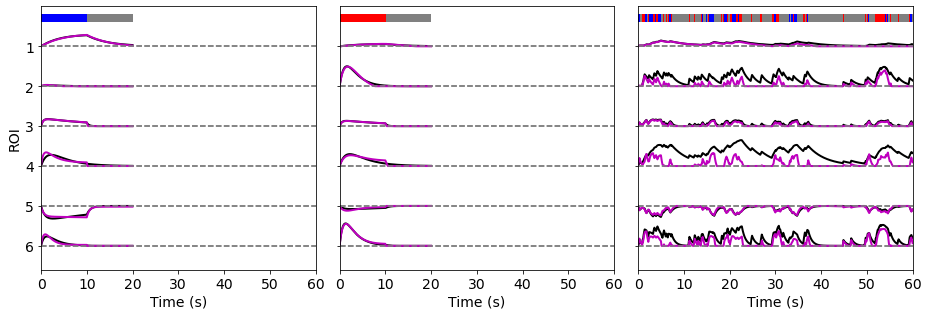

In [4]:
nrns_plot = [11, 79, 21, 148, 5, 118]
nplot = len(nrns_plot)

fig, axs = plt.subplots(1, 3, figsize=(13, nplot*.75), tight_layout=True, sharey=True)
axs[0].set_ylabel('ROI')

for mdl, (color, fname, smlt) in MDLS_META.items():
    for ax, (t, i_s, i_p) in zip(axs, songs):

        # load neural params
        params = np.load(f'data/simple/neur/{fname}', allow_pickle=True)[0]
        rs = smlt(i_s, i_p, params, DT)
        
        for cnrn, inrn in enumerate(nrns_plot):
            r = rs[:, inrn]
            ax.plot(t, r/2 - 5*cnrn, c=color, lw=2)
            ax.axhline(-5*cnrn, color='gray', ls='--')

        b = np.zeros(len(t))
        b[i_s == 1] = 1
        b[i_p == 1] = 2

        plot_b(ax, t, b, extent=[t[0], t[-1]+DT, 3, 4], c=['gray', 'b', 'r'])

        ax.set_ylim(top=10)

        y_ticks = -5*np.arange(nplot)
        y_tick_labels = np.arange(nplot)+1
        
        set_plot(ax, x_lim=(0, TSTOP-TSTART), y_lim=(-5*nplot+2, 5), y_ticks=y_ticks, y_tick_labels=y_tick_labels, x_label='Time (s)', font_size=14)
        
fig.savefig('ms/fig_1e.svg')